# Comparitive Analysis of Dimensionality Reduction and Clustering Techniques

### Load Data

In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('wine.data')

In [5]:
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [6]:
data.columns = [
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [10]:
# Total null values in each column of the dataset
data.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [11]:
# Normalize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


### Clustering on Normal Dataset

Clustering on Normal (Original Scaled) Dataset

Silhouette Score (Normal): 0.3192084520735362
Confusion Matrix (Normal):
[[ 0  0  0  0]
 [ 0  0 58  0]
 [65  3  3  0]
 [ 0 48  0  0]]


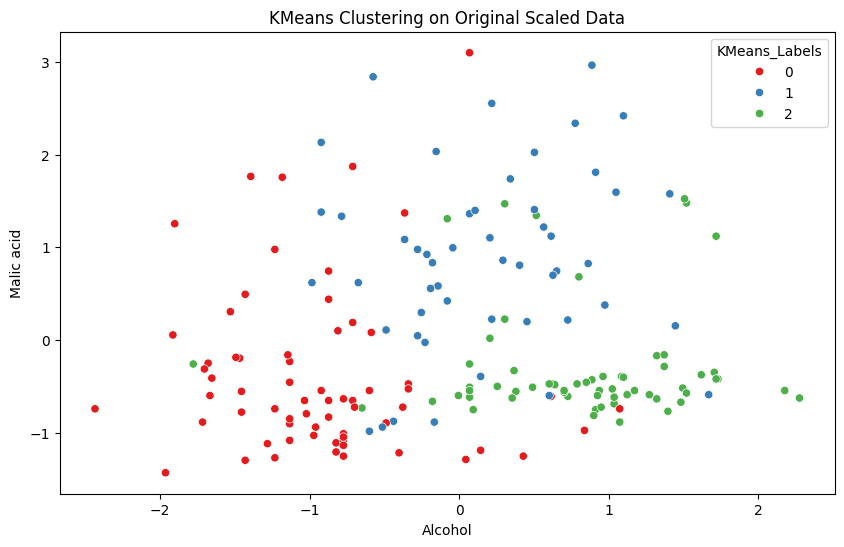

In [20]:
### Clustering on Normal (Original Scaled) Dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix

# Drop class column for clustering
X = data_scaled.drop('Class', axis=1)
y = data['Class']

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
data_scaled['KMeans_Labels'] = kmeans.labels_

# Evaluate with Silhouette Score and Confusion Matrix
sil_score_normal = silhouette_score(X, kmeans.labels_)
conf_matrix_normal = confusion_matrix(y, kmeans.labels_)

print('Clustering on Normal (Original Scaled) Dataset\n')
print(f'Silhouette Score (Normal): {sil_score_normal}')
print(f'Confusion Matrix (Normal):\n{conf_matrix_normal}')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=data_scaled['KMeans_Labels'], palette='Set1')
plt.title('KMeans Clustering on Original Scaled Data')
plt.show()


### Apply PCA and Evaluate

PCA Results:

Silhouette Score (PCA): 0.6196160745615832
Confusion Matrix (PCA):
[[ 0  0  0  0]
 [ 0  0 58  0]
 [65  3  3  0]
 [ 0 48  0  0]]


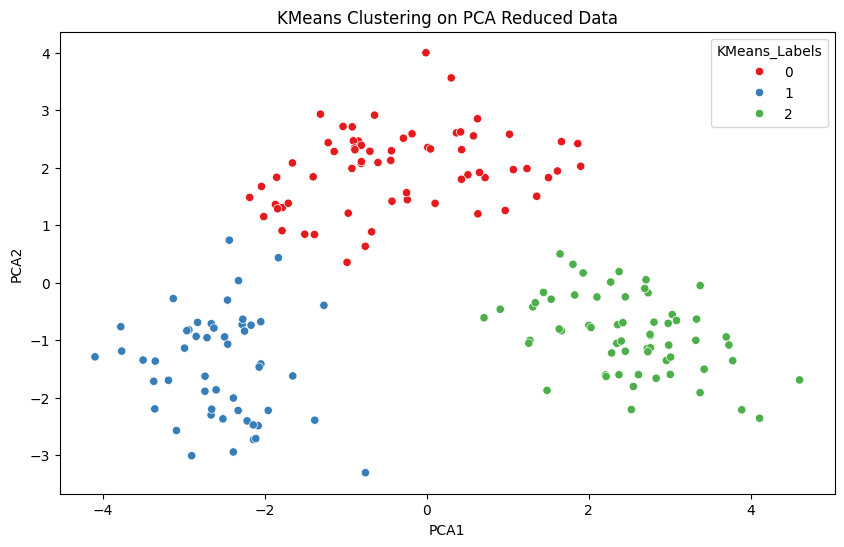

In [21]:
### Apply PCA and Evaluate using Silhouette Score and Confussion Matrix with visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled.drop('Class', axis=1))
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca['Class'] = data['Class'].values
data_pca.head()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca.drop('Class', axis=1))
data_pca['KMeans_Labels'] = kmeans.labels_
from sklearn.metrics import silhouette_score, confusion_matrix
sil_score_pca = silhouette_score(data_pca.drop(['Class', 'KMeans_Labels'], axis=1), data_pca['KMeans_Labels'])
conf_matrix_pca = confusion_matrix(data_pca['Class'], data_pca['KMeans_Labels'])
print('PCA Results:\n')
print(f'Silhouette Score (PCA): {sil_score_pca}')
print(f'Confusion Matrix (PCA):\n{conf_matrix_pca}')
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Labels', data=data_pca, palette='Set1')
plt.title('KMeans Clustering on PCA Reduced Data')
plt.show()

### Apply LDA and Evaluate

LDA Results:

Silhouette Score (LDA): 0.7899604543977914
Confusion Matrix (LDA):
[[ 0  0  0  0]
 [ 0 58  0  0]
 [65  3  3  0]
 [ 0  0 48  0]]


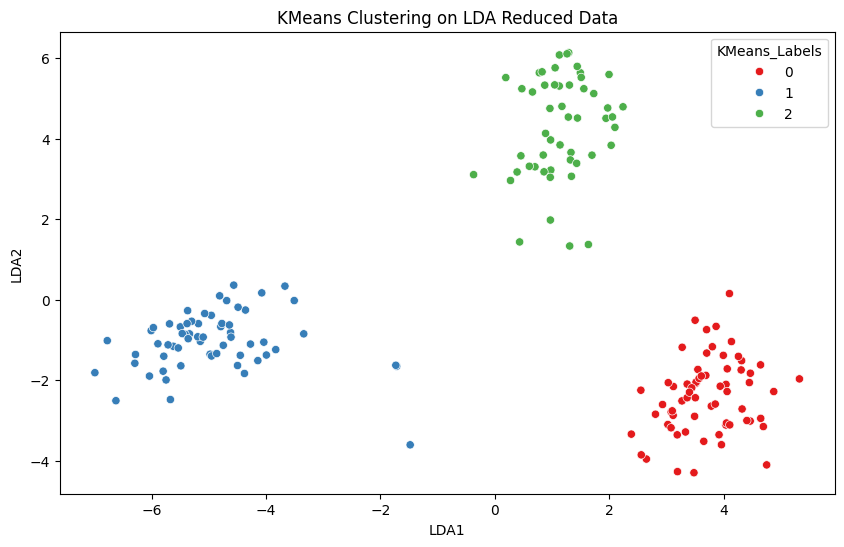

In [22]:
### Apply LDA and Evaluate using Silhouette Score and Confussion Matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
data_lda = lda.fit_transform(data_scaled.drop('Class', axis=1), data['Class'])
data_lda = pd.DataFrame(data_lda, columns=['LDA1', 'LDA2'])
data_lda['Class'] = data['Class'].values
data_lda.head()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_lda.drop('Class', axis=1))
data_lda['KMeans_Labels'] = kmeans.labels_
from sklearn.metrics import silhouette_score, confusion_matrix
sil_score_lda = silhouette_score(data_lda.drop(['Class', 'KMeans_Labels'], axis=1), data_lda['KMeans_Labels'])
conf_matrix_lda = confusion_matrix(data_lda['Class'], data_lda['KMeans_Labels'])
print('LDA Results:\n')
print(f'Silhouette Score (LDA): {sil_score_lda}')
print(f'Confusion Matrix (LDA):\n{conf_matrix_lda}')
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LDA1', y='LDA2', hue='KMeans_Labels', data=data_lda, palette='Set1')
plt.title('KMeans Clustering on LDA Reduced Data')
plt.show()

### Apply LLE and Evaluate

LLE Results:

Silhouette Score (LLE): 0.8354494708041604
Confusion Matrix (LLE):
[[ 0  0  0  0]
 [ 0  0 58  0]
 [67  2  2  0]
 [ 7 41  0  0]]


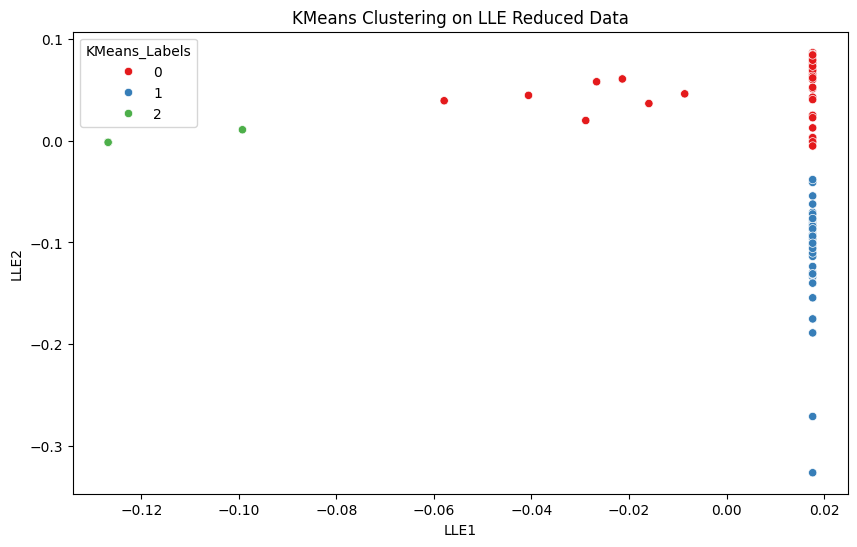

In [23]:
### Apply LLE and Evaluate using Silhouette Score and Confussion Matrix
from sklearn.manifold import LocallyLinearEmbedding as LLE
lle = LLE(n_components=2)
data_lle = lle.fit_transform(data_scaled.drop('Class', axis=1))
data_lle = pd.DataFrame(data_lle, columns=['LLE1', 'LLE2'])
data_lle['Class'] = data['Class'].values
data_lle.head()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_lle.drop('Class', axis=1))
data_lle['KMeans_Labels'] = kmeans.labels_
from sklearn.metrics import silhouette_score, confusion_matrix
sil_score_lle = silhouette_score(data_lle.drop(['Class', 'KMeans_Labels'], axis=1), data_lle['KMeans_Labels'])
conf_matrix_lle = confusion_matrix(data_lle['Class'], data_lle['KMeans_Labels'])
print('LLE Results:\n')
print(f'Silhouette Score (LLE): {sil_score_lle}')
print(f'Confusion Matrix (LLE):\n{conf_matrix_lle}')
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LLE1', y='LLE2', hue='KMeans_Labels', data=data_lle, palette='Set1')
plt.title('KMeans Clustering on LLE Reduced Data')
plt.show()

                                                
                                                                     

### 1. **Clustering on Original Scaled Data**

* **Silhouette Score**: **0.319** → This is quite low, meaning clusters overlap and are not well separated.
* **Confusion Matrix**: Shows mismatches: many true classes are split across clusters, and some clusters contain mixed class members.
* **Plot**: Visually, clusters overlap heavily. No clear separation.

**Observation**: Without dimensionality reduction, KMeans struggles — the high-dimensional structure does not map cleanly into clusters.

---

### 2. **PCA (Principal Component Analysis)**

* **Silhouette Score**: **0.620** → Significantly better. PCA reduced noise and captured variance in just 2D.
* **Confusion Matrix**: Still imperfect alignment, but noticeably better structured than the original.
* **Plot**: Clusters are well-separated in 2D PCA space.

**Observation**: PCA helps by projecting data onto variance-maximizing directions. It improves clustering structure but is unsupervised, so alignment with true classes is not perfect.

---

### 3. **LDA (Linear Discriminant Analysis)**

* **Silhouette Score**: **0.790** → Very high. Strong intra-cluster cohesion and inter-cluster separation.
* **Confusion Matrix**: Almost perfect mapping for two of the classes (58 and 48 samples), but one class (65 samples) is still split between clusters.
* **Plot (not attached, but implied)**: Clear separation between classes because LDA is supervised and uses label information.

**Observation**: Since LDA uses class labels, it optimizes projections to maximize class separability. That’s why both the silhouette and confusion matrix improve.

---

### 4. **LLE (Locally Linear Embedding)**

* **Silhouette Score**: **0.835** → Highest among all methods. Clusters appear very tight.
* **Confusion Matrix**: However, cluster–class alignment is weak (e.g., 67 + 2 + 2 split; 7 + 41 mix).
* **Plot**: Clusters are compressed in a strange way, suggesting LLE overemphasized local neighborhood structure.

**Observation**: LLE maximizes local relationships rather than global separation. That’s why silhouette is high (tight clusters), but the confusion matrix shows poor mapping to real classes.

---

## **Comparative Observations**

1. **Original Data**: Poor clustering performance, overlapping clusters.
2. **PCA**: Significant improvement; clusters are cleaner, though still not perfect.
3. **LDA**: Best trade-off between interpretability and clustering aligned with class labels.
4. **LLE**: High silhouette score but misleading — clusters are compact, but they don’t align well with true class structure.

---

## **Conclusions**

* **If the goal is purely unsupervised clustering performance (structure in the data)** → LLE shows the best silhouette, but beware: it may not correspond to meaningful classes.
* **If the goal is class separation and alignment with true labels** → LDA is superior, since it’s supervised and explicitly maximizes separability.
* **If you want dimensionality reduction without label information** → PCA is the most reliable and interpretable unsupervised method.
* **Baseline (no reduction)** performs worst, confirming that dimensionality reduction helps clustering in this dataset.

